# 데이터 시각화

- https://matplotlib.org/

## matplotlib로 그래프 그리기

In [1]:
import matplotlib.pyplot as plt

###  선 그래프

####  기본적인 선 그래프 그리기

In [2]:
data1 = [10, 14, 19, 20, 25]

```
> plot([x], y, [fmt], *, data=None, **kwargs)
> plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)```
y값만 입력하기


#대괄호는 선택사항

x,y,fmt이 한 묶음

In [ ]:

plt.plot(data1)

In [ ]:
plt.plot(data1)
plt.show()

In [ ]:
try:
    %matplotlib qt
except:
    # version 변경되면서 설치해줘야함.
    !pip3 install PyQt5
    %matplotlib qt

In [ ]:
plt.plot(data1)

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np

x = np.arange(-4.5, 5, 0.5) # 배열 x 생성. 범위: [-4.5, 5), 0.5씩 증가
y = 2*x**2 # y=2x^2 => 수식을 이용해 배열 x에 대응하는 배열 y 생성
[x,y]

In [ ]:
plt.plot(x,y)
plt.show()

#### 여러 그래프 그리기

In [ ]:
import numpy as np

x = np.arange(-4.5, 5, 0.5)
y1 = 2*x**2
y2 = 5*x + 30
y3 = 4*x**2 + 10

In [ ]:
import matplotlib.pyplot as plt
# (보통 나눌때는 스타일이 다를때)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

In [ ]:
plt.plot(x, y1, x, y2, x, y3) # 한 줄에 그리기 
plt.show()

In [ ]:
plt.plot(x, y1) #처음 그리기 함수를 수행하면 그래프 창이 자동으로 생성됨 

plt.figure() # 새로운 그래프 창을 생성함
plt.plot(x, y2) # 새롭게 생성된 그래프 창에 그래프를 그림

# 총 세개를 그림
plt.figure()
plt.plot(x, y3)

plt.show()

In [ ]:
import numpy as np

# 데이터 생성
x = np.arange(-5, 5, 0.1)
y1 = x**2 -2
y2 = 20*np.cos(x)**2 # NumPy에서 cos()는 np.cos()으로 입력

# figure에 이름 정하기

plt.figure(1) # 1번 그래프 창을 생성함
plt.plot(x, y1) # 지정된 그래프 창에 그래프를 그림 

plt.figure(2) # 2번 그래프 창을 생성함
plt.plot(x, y2) # 지정된 그래프 창에 그래프를 그림

plt.figure(1) # 이미 생성된 1번 그래프 창을 지정함
plt.plot(x, y2) # 지정된 그래프 창에 그래프를 그림

plt.figure(2) # 이미 생성된 2번 그래프 창을 지정함
plt.clf() # clear figure 2번 그래프 창에 그려진 모든 그래프를 지움
plt.plot(x, y1) # 지정된 그래프 창에 그래프를 그림

plt.show()

## figure은 한 번 그려지면 모두 초기화됨

In [ ]:
import numpy as np

# 데이터 생성
x = np.arange(0, 10, 0.1)
y1 = 0.3*(x-5)**2 + 1
y2 = -1.5*x + 3
y3 = np.sin(x)**2 # NumPy에서 sin()은 np.sin()으로 입력

# exponential 지수함수
y4 = 10*np.exp(-x) + 1 # NumPy에서 exp()는 np.exp()로 입력 

# 2 × 2 행렬로 이뤄진 하위 그래프에서 p에 따라 위치를 지정
# subplot그리기
plt.subplot(2,2,1) # p는 1 
plt.plot(x,y1)

plt.subplot(2,2,2) # p는 2
plt.plot(x,y2)

plt.subplot(2,2,3) # p는 3
plt.plot(x,y3)

plt.subplot(2,2,4) # p는 4
plt.plot(x,y4)

plt.show()

##### **추가**
- 보통 subplot은 for문과 함께 씀  
상관관계를 조사한다고 생각해보자.

In [ ]:
try:
    from sklearn.datasets import load_boston
except ImportError as e:
    !pip3 install scikit-learn
    from sklearn.datasets import load_boston
finally:
    import pandas as pd

In [ ]:
# boston 집 가격
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target


In [ ]:
df.shape # (506,14)

In [ ]:
df.columns

In [ ]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig,axs = plt.subplots(7, 2, figsize=(20,20))
axs = axs.ravel()
for ax, column in zip(axs, columns):
    ax.plot(df[column], y, 'o')
    ax.set_ylabel('price', fontsize=18)
    ax.set_xlabel(column, fontsize=18)

plt.tight_layout()

**seaborn 사용하기**
https://seaborn.pydata.org/

In [ ]:
try:
    import seaborn as sns
except ImportError as e:
    !pip install seaborn
    import seaborn as sns

In [ ]:
df.head()

In [ ]:
df['price'] = y
df.head()

In [ ]:
sns.pairplot(df.iloc[:, :3], corner=False) # cor= Fal 대칭이나까 한쪽만

In [ ]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
pp = sns.pairplot(df.iloc[:, :3], corner=False)
pp.map_upper(hide_current_axis)

#### 그래프의 출력 범위 지정하기

In [ ]:
import numpy as np

x = np.linspace(-4, 4,100) # [-4, 4] 범위에서 100개의 값 생성
y1 = x**3  
y2 = 10*x**2 - 2

plt.plot(x, y1, x, y2)
plt.show()

In [ ]:
plt.plot(x, y1, x, y2)
plt.xlim(-1, 1)
plt.ylim(-3, 3)
plt.show()

###  그래프 꾸미기

#### 출력 형식 지정

In [3]:
import numpy as np
x = np.arange(0, 5, 1)
y1 = x
y2 = x + 1
y3 = x + 2
y4 = x + 3

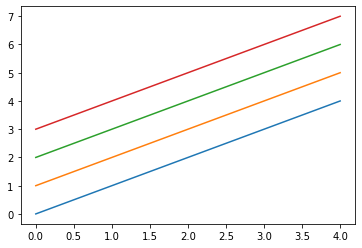

In [4]:
# 자동으로 color
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

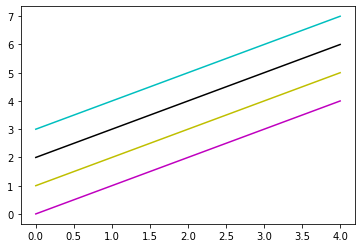

In [5]:
plt.plot(x, y1, 'm', x, y2,'y', x, y3, 'k', x, y4, 'c')
plt.show()

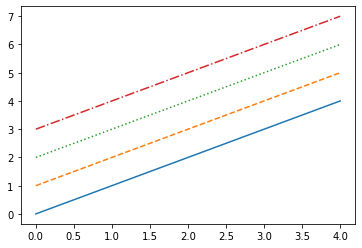

In [6]:
plt.plot(x, y1, '-', x, y2, '--', x, y3, ':',  x, y4, '-.')

plt.show()

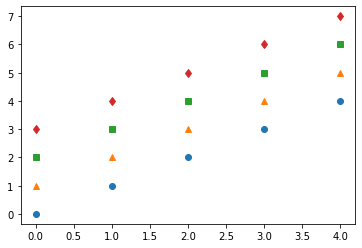

In [7]:
plt.plot(x, y1, 'o', x, y2, '^',x, y3, 's', x, y4, 'd') # square, diamond
plt.show()

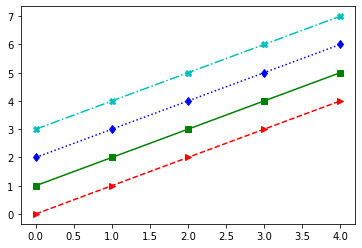

In [8]:
# scatter + line (순서 상관 X)
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.show()

#### 라벨, 제목, 격자, 범례, 문자열 표시

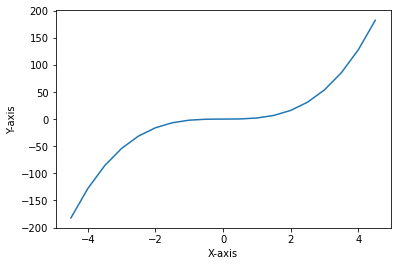

In [9]:
import numpy as np

x = np.arange(-4.5, 5, 0.5)
y = 2*x**3

plt.plot(x,y)
# subplot의 set_xlabel과 구별
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

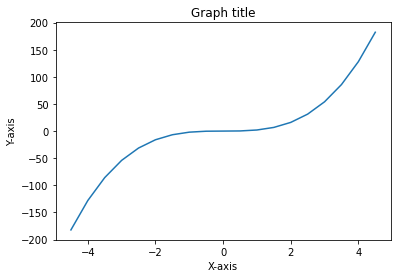

In [10]:
plt.plot(x,y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph title')
plt.show()

In [ ]:
plt.plot(x,y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph title')
plt.grid(True) # 'plt.grid()'도 가능
# plt.grid()

In [ ]:
import numpy as np
x = np.arange(0, 5, 1)
y1 = x
y2 = x + 1
y3 = x + 2
y4 = x + 3

plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.legend(['data1', 'data2', 'data3', 'data4']) # legend(명각) - 범례
plt.show()

In [ ]:
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.legend(['data1', 'data2', 'data3', 'data4'], loc = 'lower right') # legend 위치 (upper,lower), (left, right)
plt.show()

In [ ]:
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.legend(['data1', 'data2', 'data3', 'data4'], loc = 4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph title')
plt.grid(True)

In [ ]:
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.legend(['데이터1', '데이터2', '데이터3', '데이터4'], loc = 4)
plt.xlabel('X-축')
plt.ylabel('Y-축')
plt.title('샘플 그래프')
plt.grid(True)

In [ ]:
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False

**[한글설정] platform 별로 다르게**

In [16]:
# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.legend(['데이터1', '데이터2', '데이터3', '데이터4'], loc = 'best')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('그래프 제목')
plt.grid(True)

In [ ]:
plt.plot(x, y1, '>--r', x, y2, 's-g', x, y3, 'd:b', x, y4, '-.Xc')
plt.text(0, 6, "문자열 출력 1") # 문자열 위치(x,y) 정해서 출력하기
plt.text(0, 5, "문자열 출력 2")
plt.text(3, 1, "문자열 출력 3")
plt.text(3, 0, "문자열 출력 4")

#추가
plt.text(-2, 0, "문자열 출력 5")
plt.show()

### 산점도

In [ ]:
import matplotlib.pyplot as plt

height = [165, 177, 160, 180, 185, 155, 172]   # 키 데이터
weight = [62, 67, 55, 74, 90, 43, 64]   # 몸무게 데이터

plt.scatter(height, weight)
plt.xlabel('Height(m)')
plt.ylabel('Weight(Kg)')
plt.title('Height & Weight')
plt.grid(True)

In [ ]:
plt.scatter(height, weight, s=500, c='r') # 마커 크기는(s=size) 500, 컬러는(c=color) 붉은색(red)
plt.show()

In [12]:
import numpy as np

In [14]:
size = 100 * np.arange(1,8) # 데이터별로 마커의 크기 지정
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y'] # 데이터별로 마커의 컬러 지정

#! s와 color를 배열로 전달.
#! 배열이 아니라면 plt에서 broadcast해서 같은색이 나옴.
plt.scatter(height, weight, s=size, c=colors, alpha=0.2)
plt.show()

NameError: name 'height' is not defined

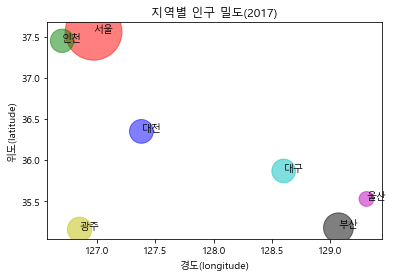

In [17]:
import numpy as np

city = ['서울', '인천', '대전', '대구', '울산', '부산', '광주']

# 위도(latitude)와 경도(longitude)
lat  = [37.56, 37.45, 36.35, 35.87, 35.53, 35.18, 35.16] 
lon = [126.97, 126.70, 127.38, 128.60, 129.31, 129.07, 126.85]

# 인구 밀도(명/km^2): 2017년 통계청 자료
pop_den = [16154, 2751, 2839, 2790, 1099, 4454, 2995]

size = np.array(pop_den) * 0.2 # 마커의 크기 지정 # 왜 array?
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y'] # 마커의 컬러 지정


#!! alpha: 투명도.
plt.scatter(lon, lat, s=size, c=colors, alpha=0.5)
plt.xlabel('경도(longitude)')
plt.ylabel('위도(latitude)')
plt.title('지역별 인구 밀도(2017)')

for x, y, name in zip(lon, lat, city):
    plt.text(x, y, name) # 위도 경도에 맞게 도시 이름 출력
    # plt.text(x, y, name, fontdict={"color":'black', 'fontsize':15}) # 위도 경도에 맞게 도시 이름 출력

plt.show()

### 막대 그래프

In [18]:
member_IDs = ['m_01', 'm_02', 'm_03', 'm_04'] # 회원 ID
before_ex = [27, 35, 40, 33] # 운동 시작 전
after_ex = [30, 38, 42, 37] # 운동 한 달 후

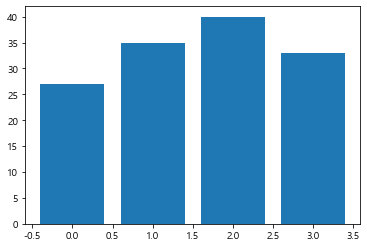

In [19]:
import matplotlib.pyplot as plt
import numpy as np

n_data = len(member_IDs)     # 회원이 네 명이므로 전체 데이터 수는 4
index = np.arange(n_data)   # NumPy를 이용해 배열 생성 (0, 1, 2, 3)
plt.bar(index, before_ex)   # bar(x,y)에서 x=index, height=before_ex 로 지정
plt.show()

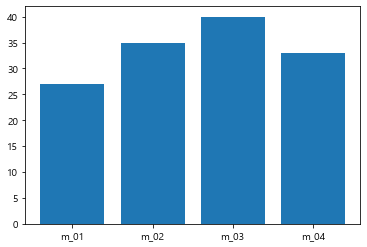

In [20]:
plt.bar(index, before_ex, tick_label = member_IDs)
plt.show()

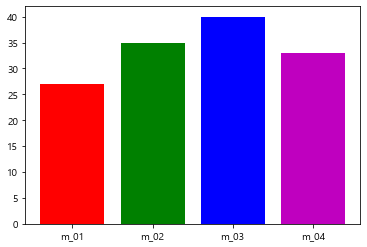

In [21]:
colors=['r', 'g', 'b', 'm']
plt.bar(index, before_ex, color = colors, tick_label = member_IDs)
plt.show()

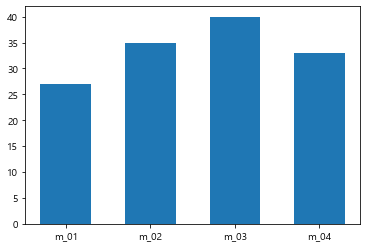

In [22]:
plt.bar(index, before_ex, tick_label = member_IDs, width = 0.6)
plt.show()

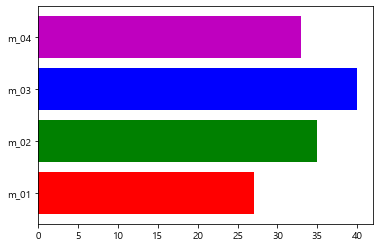

In [23]:
#!! barh: bar horizon 
colors=['r', 'g', 'b', 'm']
plt.barh(index, before_ex, color = colors, tick_label = member_IDs)
plt.show()

In [ ]:
index

In [ ]:
#! bar 넓이
barWidth = 0.4

#! bar 2개 그리기 # width 속성, label 속성
plt.bar(index, before_ex, color='c', align='edge', width = barWidth, label='before')
plt.bar(index + barWidth, after_ex , color='m', align='edge', width = barWidth, label='after')

#! tick: 표시하는 단위
plt.xticks(index + barWidth, member_IDs) #! (위치, 표시할 내용)
plt.legend()
plt.xlabel('회원 ID')
plt.ylabel('윗몸일으키기 횟수')
plt.title('운동 시작 전과 후의 근지구력(복근) 변화 비교')
plt.show()

### 히스토그램

(array([12., 11., 11.,  6.,  6.,  4., 12., 15., 13., 10.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

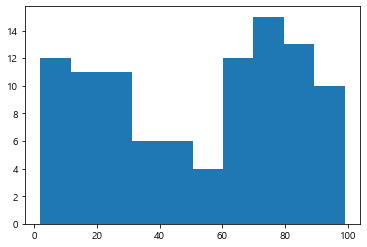

In [24]:
import matplotlib.pyplot as plt

math = np.random.randint(1, 100, (100,))
# math = [76, 82, 84, 83, 90, 86, 85, 92, 72, 71, 100, 87, 81, 76, 94, 78, 81, 60, 79, 69, 74, 87, 82, 68, 79]
plt.hist(math)

(array([30., 16., 22., 32.]),
 array([ 2.  , 26.25, 50.5 , 74.75, 99.  ]),
 <BarContainer object of 4 artists>)

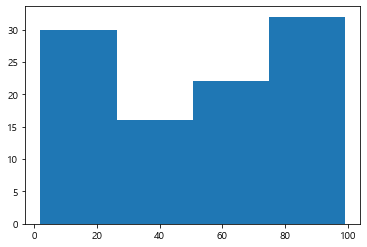

In [25]:
plt.hist(math, bins=4)   

In [ ]:
plt.hist(math, bins= 8) # 막대의 개수
plt.show()

In [ ]:
plt.hist(math, bins= 8)
plt.xlabel('시험 점수')
plt.ylabel('도수(frequency)')
plt.title('수학 시험의 히스토그램')
plt.grid()
plt.show()

### 파이 그래프

In [27]:
fruit = ['사과', '바나나', '딸기', '오렌지', '포도']
result = [7, 6, 3, 2, 2]

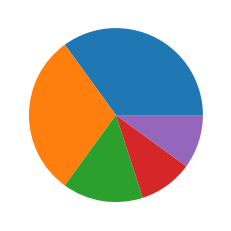

In [28]:
import matplotlib.pyplot as plt

#! pie 그래프
plt.pie(result)
plt.show()

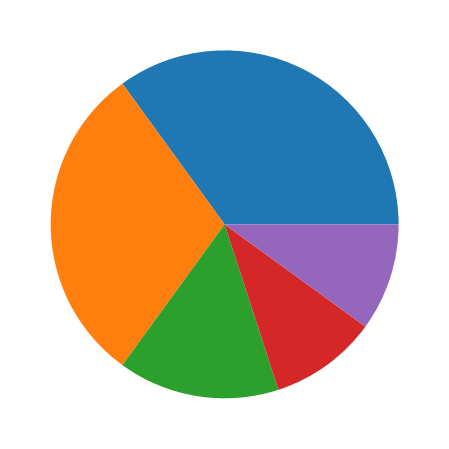

In [29]:
plt.figure(figsize=(8,8)) # size 지정.
plt.pie(result)
plt.show()

In [30]:
fruit, result

(['사과', '바나나', '딸기', '오렌지', '포도'], [7, 6, 3, 2, 2])

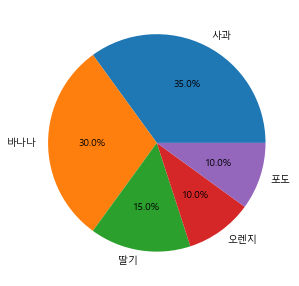

In [31]:
# 자동으로 %로 변환
plt.figure(figsize=(5,5))
plt.pie(result, labels= fruit, autopct='%.1f%%') # auto percent (소수점 첫째자리까지)하고, 뒤에 % 붙임.
plt.show()

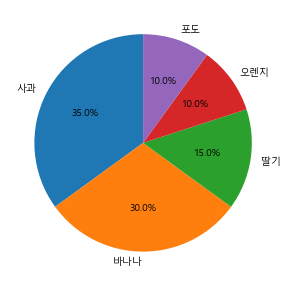

In [32]:
plt.figure(figsize=(5,5))
plt.pie(result, labels= fruit, autopct='%.1f%%', startangle=90) # !! 90도 회전 시계방향
plt.show()

# %는 서식문자열이기 때문에 문자로 표현하기 위해서는 두번 출력

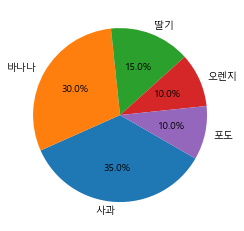

In [33]:
plt.pie(result, labels= fruit, autopct='%.1f%%', startangle=-30, counterclock = False) # 90도 회전 (시계 반대방향으로)
plt.show()

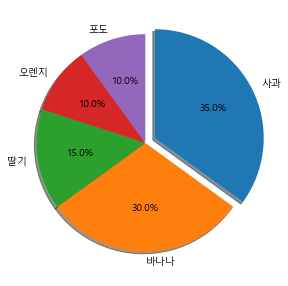

In [34]:
explode_value = (0.1, 0, 0, 0, 0) #특정 부분 쪼갬

plt.figure(figsize=(5,5))

#!! 그림자 & explode
plt.pie(result, labels= fruit, autopct='%.1f%%', startangle=90, counterclock = False, explode=explode_value, shadow=True)
plt.show()

### 그래프 저장하기

In [35]:
## !! Default값 바꿀수 있음.d
import matplotlib as mpl
mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize'] = (15,5)

In [36]:
mpl.rcParams['figure.dpi']  #dpi 해상도

72.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 1)
y1 = x
y2 = x + 1
y3 = x + 2
y4 = x + 3

plt.plot(x, y1, x, y2, x, y3, x, y4)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Saving a figure')

#!! 그래프를 이미지 파일로 저장. dpi는 100으로 설정 (해상도)
plt.savefig('saveFigTest1.png', dpi = 100) 
plt.show()
#plot을 그리고
#figure 그림

In [ ]:
import matplotlib.pyplot as plt

fruit = ['사과', '바나나', '딸기', '오렌지', '포도']
result = [7, 6, 3, 2, 2]
explode_value = (0.1, 0, 0, 0, 0)

plt.figure(figsize=(5,5)) # 그래프의 크기를 지정
plt.pie(result, labels= fruit, autopct='%.1f%%', startangle=90, counterclock = False, explode=explode_value, shadow=True)

# 그래프를 이미지 파일로 저장. dpi는 200으로 설정
plt.savefig('saveFigTest2.png', dpi = 200)
plt.show()

## pandas로 그래프 그리기

### pandas의 그래프 구조

### pandas의 선 그래프

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

s1 = pd.Series([1,2,3,4,5,6,7,8,9,10])
s1

In [ ]:
s1.plot()
plt.show()

In [ ]:
s2 = pd.Series([1,2,3,4,5,6,7,8,9,10], index = pd.date_range('2019-01-01', periods=10))
s2

In [ ]:
s2.plot()
plt.show()

In [ ]:
s2.plot(grid=True)
plt.show()

In [ ]:
df_rain = pd.read_csv('./data/sea_rain1_from_notepad.csv', index_col="연도", encoding='cp949' )
df_rain

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False



In [ ]:
df_rain.plot()
plt.show()

In [ ]:
rain_plot = df_rain.plot(grid = True, style = ['r--*', 'g-o', 'b:*', 'm-.p'])
rain_plot.set_xlabel("연도")
rain_plot.set_ylabel("강수량")
rain_plot.set_title("연간 강수량")
plt.show()

In [ ]:
year = [2006, 2008, 2010, 2012, 2014, 2016] # 연도
area = [26.2, 27.8, 28.5, 31.7, 33.5, 33.2] # 1인당 주거면적
table = {'연도':year, '주거면적':area}
df_area = pd.DataFrame(table, columns=['연도', '주거면적'])
df_area

- DataFrame.plot

In [ ]:
df_area.plot(x='연도', y='주거면적', grid = True, title = '연도별 1인당 주거면적')
plt.show()

### pandas의 산점도

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

temperature = [25.2, 27.4, 22.9, 26.2, 29.5, 33.1, 30.4, 36.1, 34.4, 29.1]
Ice_cream_sales = [236500, 357500, 203500, 365200, 446600, 574200, 453200, 675400, 598400, 463100]

dict_data = {'기온':temperature, '아이스크림 판매량':Ice_cream_sales}
df_ice_cream = pd.DataFrame(dict_data, columns=['기온', '아이스크림 판매량'])

df_ice_cream

In [ ]:
df_ice_cream.plot.scatter('기온', '아이스크림 판매량', grid=True, title='최고 기온과 아이스크림 판매량')
# df_ice_cream.plot.scatter(x='기온', y='아이스크림 판매량', grid=True, title='최고 기온과 아이스크림 판매량')
plt.show()

### pandas의 막대 그래프

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

grade_num = [5, 14, 12, 3]
students = ['A', 'B', 'C', 'D']

df_grade = pd.DataFrame(grade_num, index=students, columns = ['Student'])
df_grade

In [ ]:
grade_bar = df_grade.plot.bar(grid = True)
grade_bar.set_xlabel("학점")
grade_bar.set_ylabel("학생수")
grade_bar.set_title("학점별 학생 수 막대 그래프")
plt.show()

### pandas의 히스토그램

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

math = [76,82,84,83,90,86,85,92,72,71,100,87,81,76,94,78,81,60,79,69,74,87,82,68,79]

df_math = pd.DataFrame(math, columns = ['Student'])

math_hist = df_math.plot.hist(bins=8, grid = True)
math_hist.set_xlabel("시험 점수")
math_hist.set_ylabel("도수(frequency)")
math_hist.set_title("수학 시험의 히스토그램")

plt.show()

### pandas의 파이 그래프

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fruit = ['사과', '바나나', '딸기', '오렌지', '포도']
result = [7, 6, 3, 2, 2]

df_fruit = pd.Series(result, index = fruit, name = '선택한 학생수')
df_fruit

In [ ]:
df_fruit.plot.pie()
plt.show()

In [ ]:
explode_value = (0.1, 0, 0, 0, 0)
fruit_pie = df_fruit.plot.pie(figsize=(5, 5), autopct='%.1f%%', startangle=90, 
    counterclock = False, explode=explode_value, shadow=True, table=True)
fruit_pie.set_ylabel("") # 불필요한 y축 라벨 제거
fruit_pie.set_title("과일 선호도 조사 결과")

# 그래프를 이미지 파일로 저장. dpi는 200으로 설정
plt.savefig('saveFigTest3.png', dpi = 200)
plt.show()

## 정리

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_origin = load_boston()
X = boston_origin.data
y = boston_origin.target

In [ ]:
import pandas as pd
boston = pd.DataFrame(X, columns=boston_origin.feature_names)

In [ ]:
boston.head()

In [ ]:
boston.hist()

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr('pearson'), square=True, annot=True)
